In [1]:
import numpy as np

In [2]:
B = [[-3,12.1],[4.1,5.8]] #Bounds (x,y)
S = range(1000) #Iterations
D = range(len(B)) #Dimension
C = 10 #Tabu list length

In [3]:
def evaluate(x, y):
    return 21.5+x*np.sin(4*np.pi*x)+y*np.sin(20*np.pi*y)

In [4]:
best = {s: None for s in S}
T = []

In [5]:
#Encoding
a = {d: np.random.rand() for d in D}

In [6]:
for s in S:
    
    #Decoding
    x = {d: B[d][0]+a[d]*(B[d][1]-B[d][0]) for d in D}
    
    #Evaluation
    g = evaluate(x[0],x[1])
    
    #Selection
    notcontains = {0: True if a!=aa else False for aa in T}
    if s ==0:  best[s] = g; a_best=a
    else: 
        if g>best[s-1] and notcontains[0]: best[s] = g; x_best  = x; a_best=a.copy()
        else: best[s] = best[s-1]       
  
    #Memorizing
    T.append(a_best)
    if (len(T) > C): T.pop(0)
    
    #Neighborhood search
    a = {d: a_best[d] + 2*np.random.rand()-1 for d in D}
    
    #Reparation
    a = {d: 1 if a[d] >1 else 0 if a[d] <0 else a[d] for d in D}

In [10]:
best

{0: 17.288819944958142,
 1: 23.085085488648687,
 2: 23.085085488648687,
 3: 23.085085488648687,
 4: 23.085085488648687,
 5: 23.085085488648687,
 6: 23.085085488648687,
 7: 33.00778384717136,
 8: 33.00778384717136,
 9: 33.00778384717136,
 10: 33.00778384717136,
 11: 33.00778384717136,
 12: 33.00778384717136,
 13: 36.87762882795635,
 14: 36.87762882795635,
 15: 36.87762882795635,
 16: 36.87762882795635,
 17: 36.87762882795635,
 18: 36.87762882795635,
 19: 36.87762882795635,
 20: 36.87762882795635,
 21: 36.87762882795635,
 22: 36.87762882795635,
 23: 36.87762882795635,
 24: 36.87762882795635,
 25: 36.87762882795635,
 26: 36.87762882795635,
 27: 36.87762882795635,
 28: 36.87762882795635,
 29: 36.87762882795635,
 30: 36.87762882795635,
 31: 36.87762882795635,
 32: 36.87762882795635,
 33: 36.87762882795635,
 34: 36.87762882795635,
 35: 36.87762882795635,
 36: 36.87762882795635,
 37: 36.87762882795635,
 38: 36.87762882795635,
 39: 36.87762882795635,
 40: 36.87762882795635,
 41: 36.87762882795

In [12]:
# %load /Users/hoaidang/Desktop/Study/heuristics_optimization_in_python/visualization/visual_single_obj.py
import matplotlib.pyplot as plt
import numpy as np

def plot_landscape(B):
    x = np.linspace(B[0][0], B[0][1], 30)
    y = np.linspace(B[1][0], B[1][1], 30)
    X, Y = np.meshgrid(x, y)
    Z = evaluate(X, Y)
    plt.figure(dpi=1200)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis',edgecolor='none')

def plot_convergence(S, best):
    plt.figure(dpi=1200)
    plt.plot(list(S),list(best.values()))

def report_solution(best, S, x_best):
    print('Objective value =', best[len(S)-1])
    print(x_best)

Objective value = 38.57047025399365
{0: 12.1, 1: 5.721244290968317}


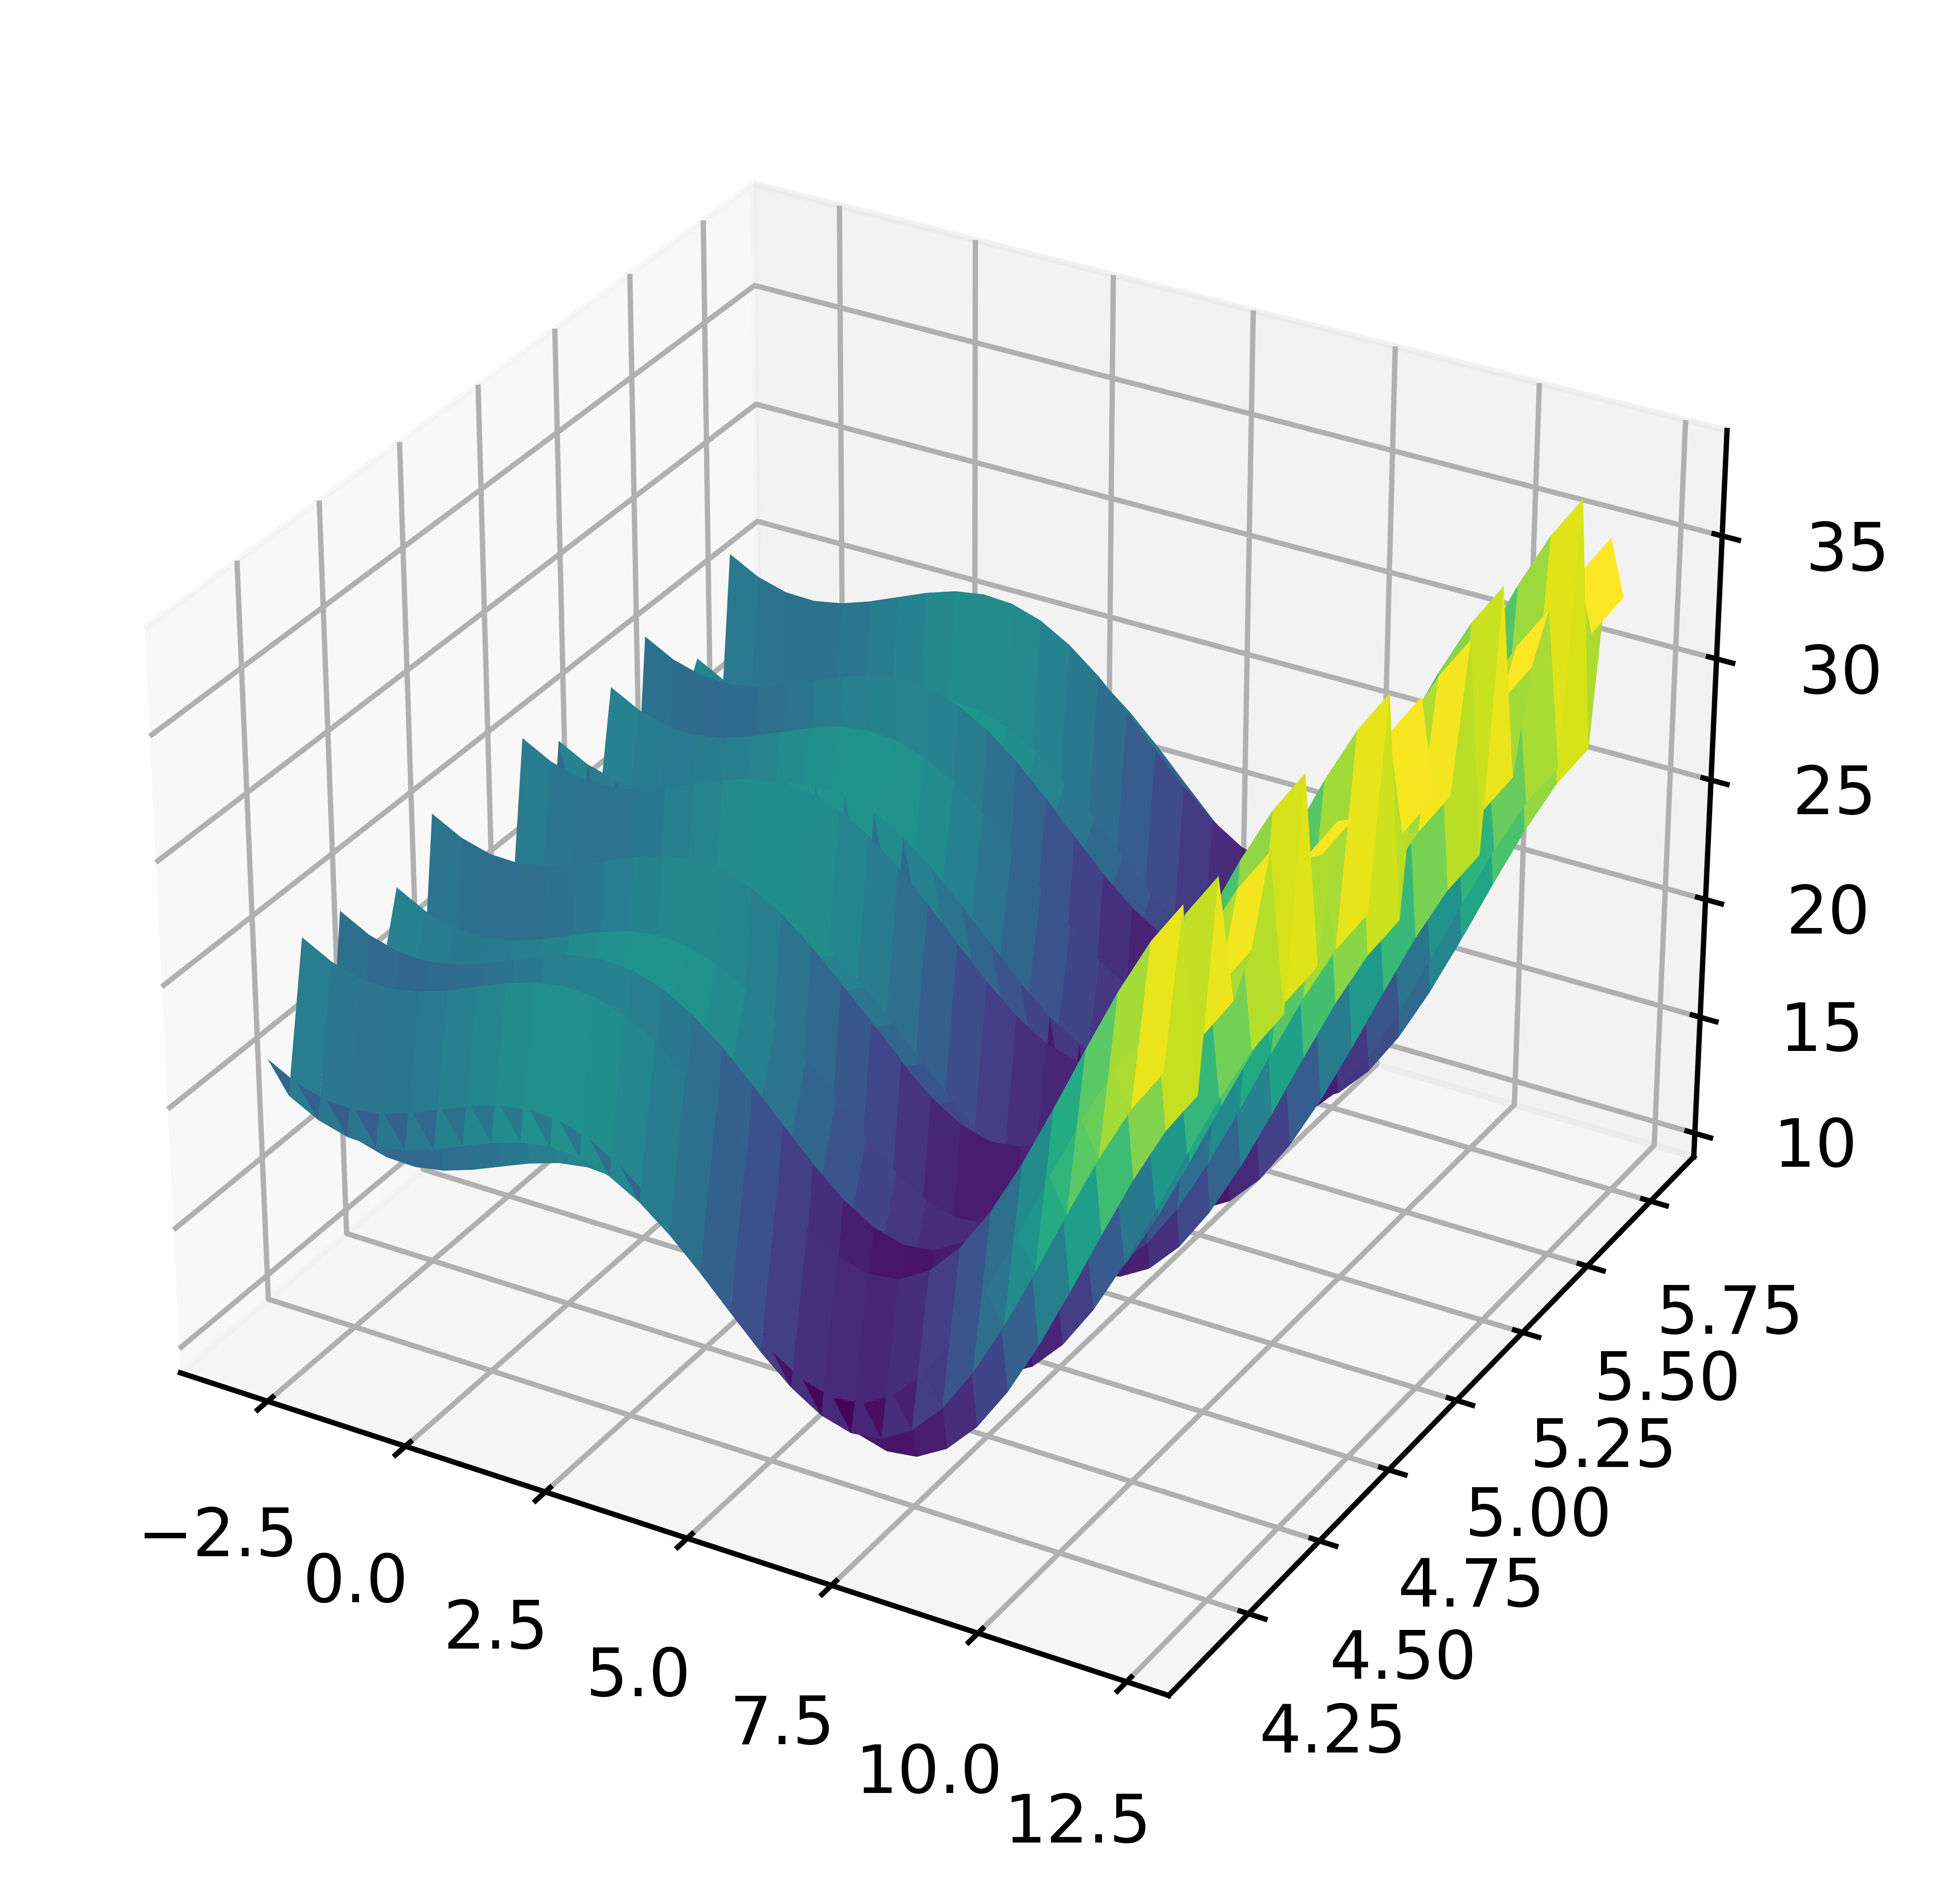

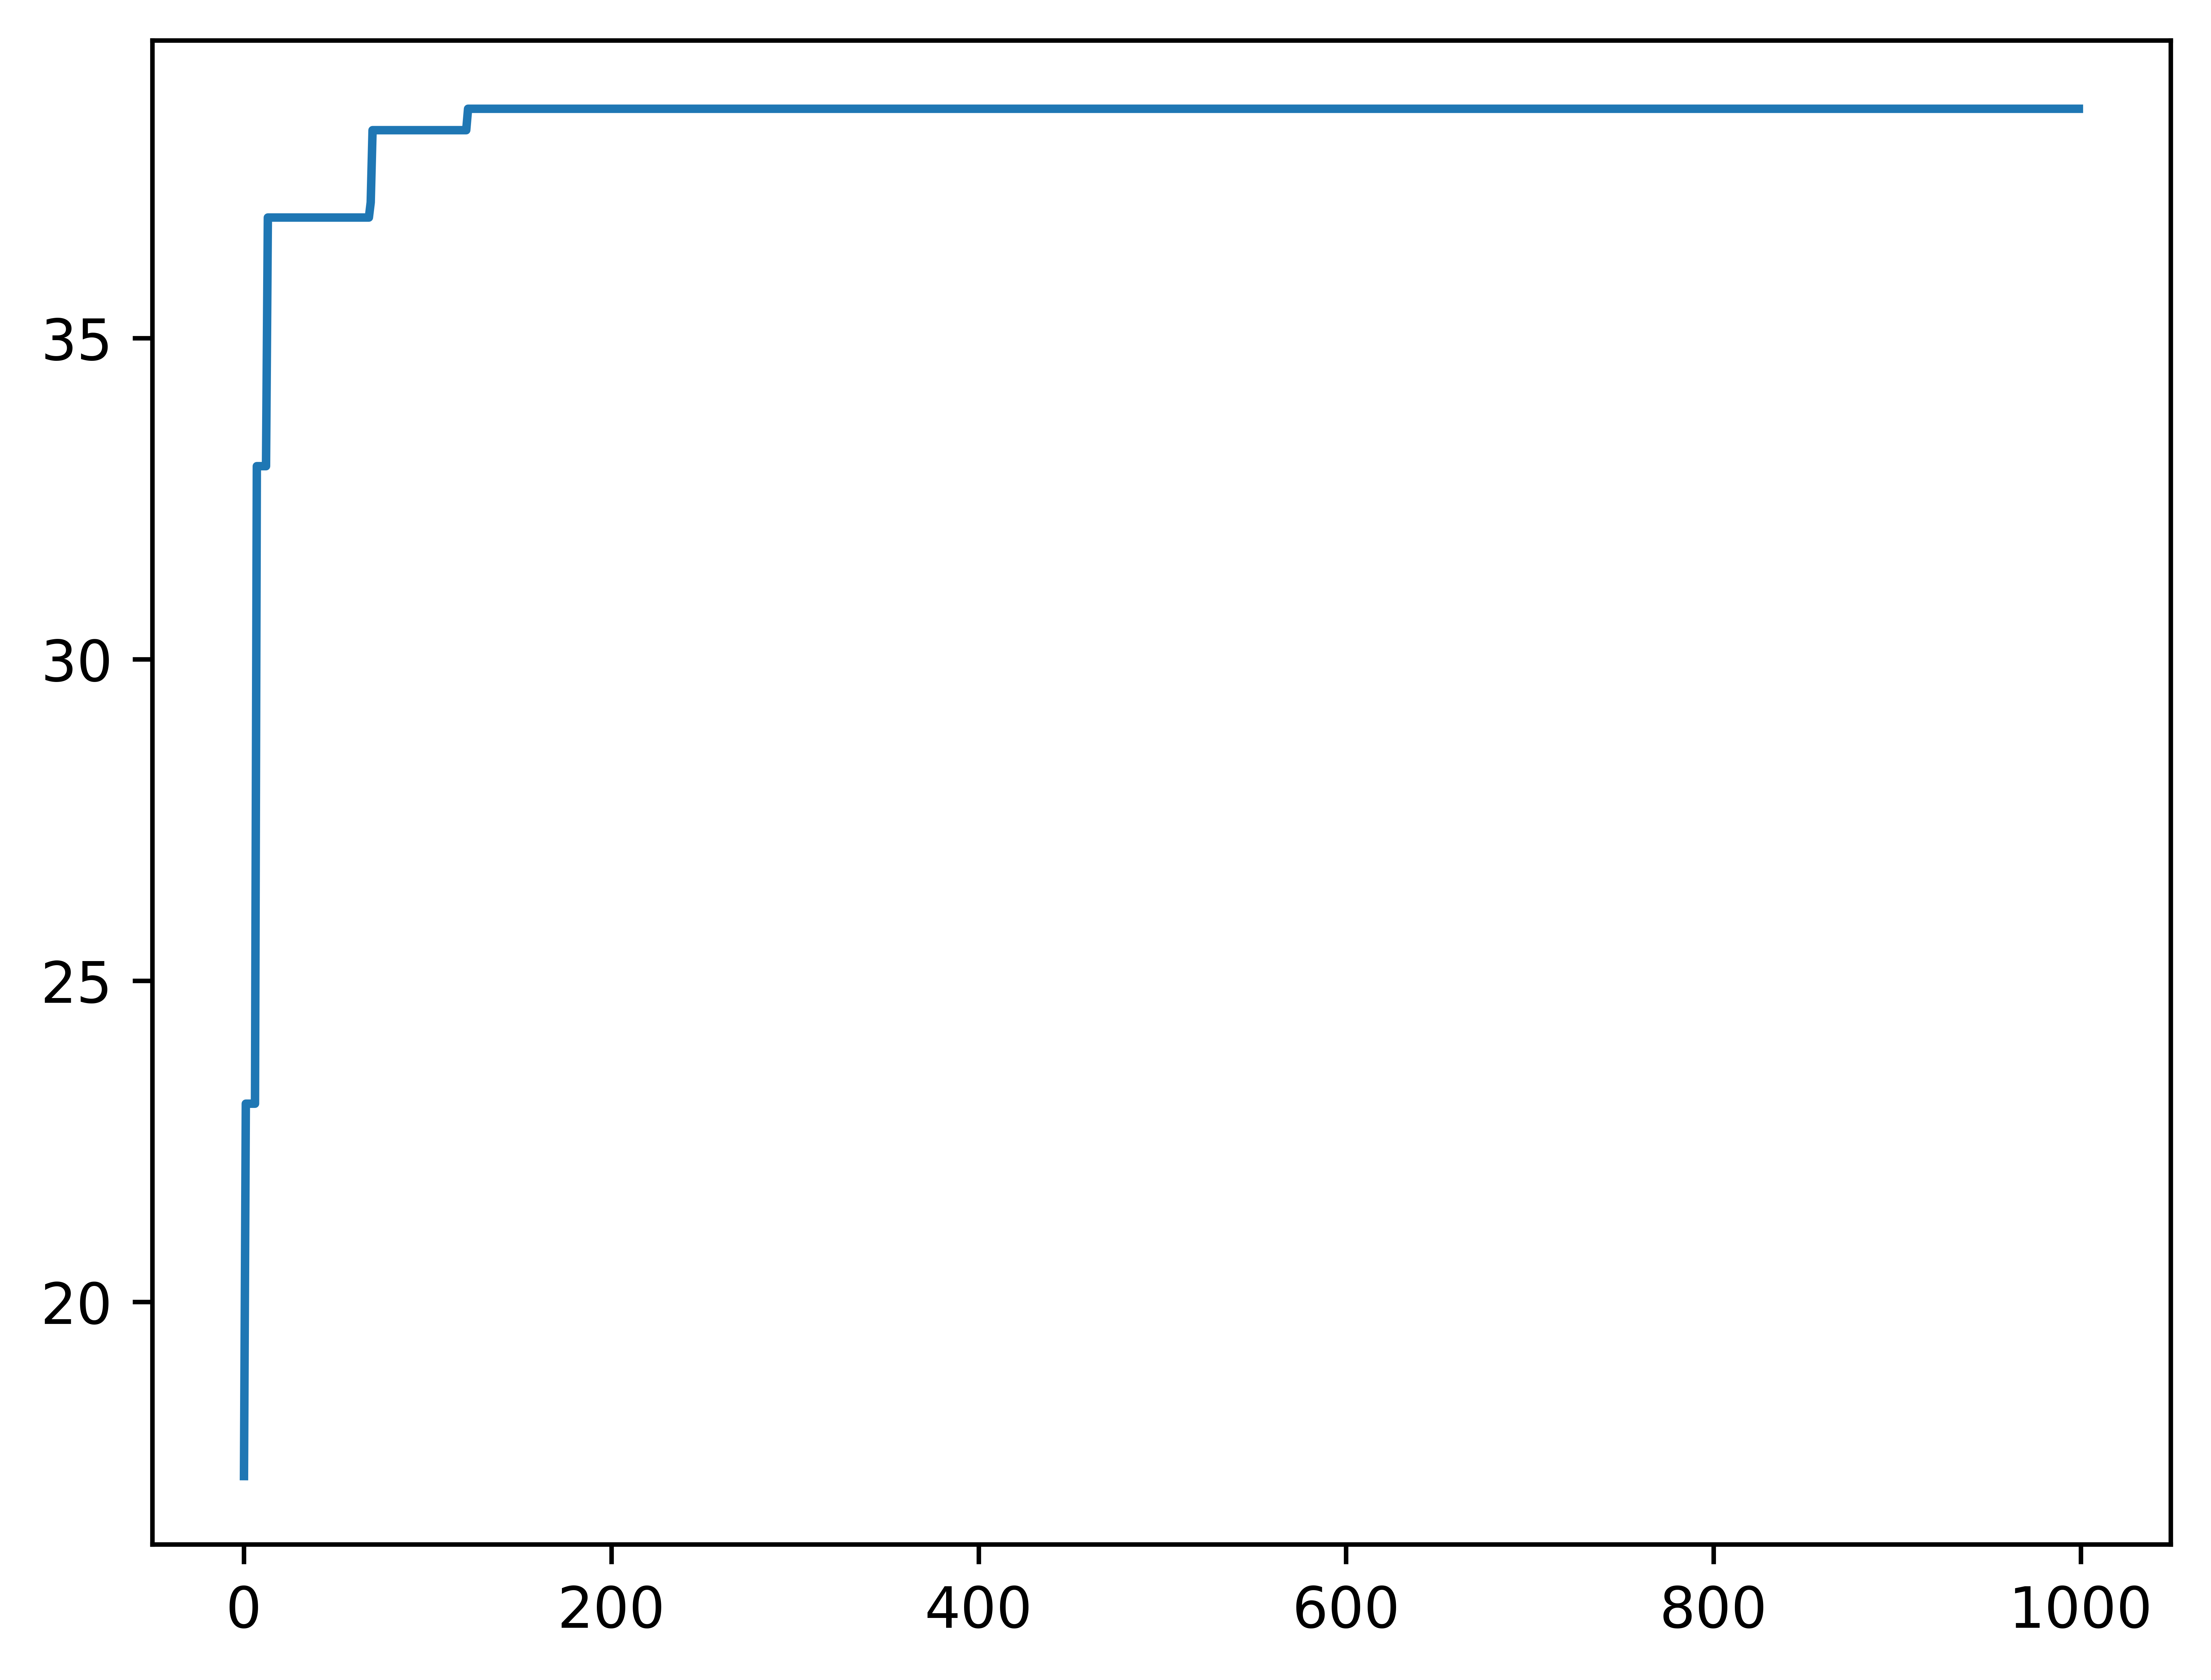

In [13]:
plot_landscape(B)
plot_convergence(S, best)     
report_solution(best, S, x_best)